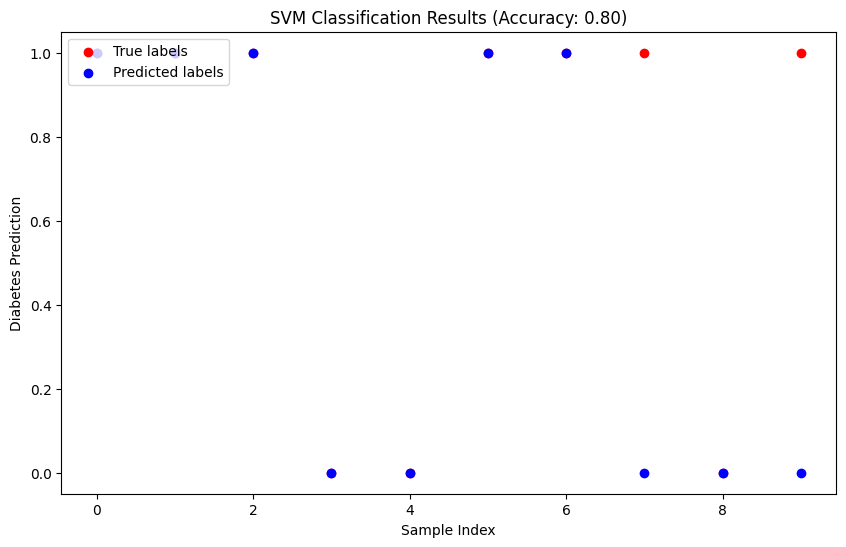

Accuracy of the SVM model on the test set: 0.80


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes_train.csv')

X = df.iloc[:-10, :-1]  # All rows except the last 10, all columns except the last (features)
y = df.iloc[:-10, -1]   # All rows except the last 10, last column (target)

# Map categorical target labels to binary
y = y.map({'tested_negative': 0, 'tested_positive': 1})

# Separate the last 10 rows as test set
X_test = df.iloc[-10:, :-1]  # Last 10 rows, all columns except the last (features)
y_test = df.iloc[-10:, -1]   # Last 10 rows, last column (target)

# Map categorical target labels to binary in the test set as well
y_test = y_test.map({'tested_negative': 0, 'tested_positive': 1})

# Create and fit the SVM classifier
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X, y)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plotting the classification results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='red', label='True labels')  # Actual test data points
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted labels')  # Predicted test data points
plt.title(f'SVM Classification Results (Accuracy: {accuracy:.2f})')
plt.xlabel('Sample Index')
plt.ylabel('Diabetes Prediction')
plt.legend(loc='upper left')
plt.show()

# Print accuracy
print(f'Accuracy of the SVM model on the test set: {accuracy:.2f}')


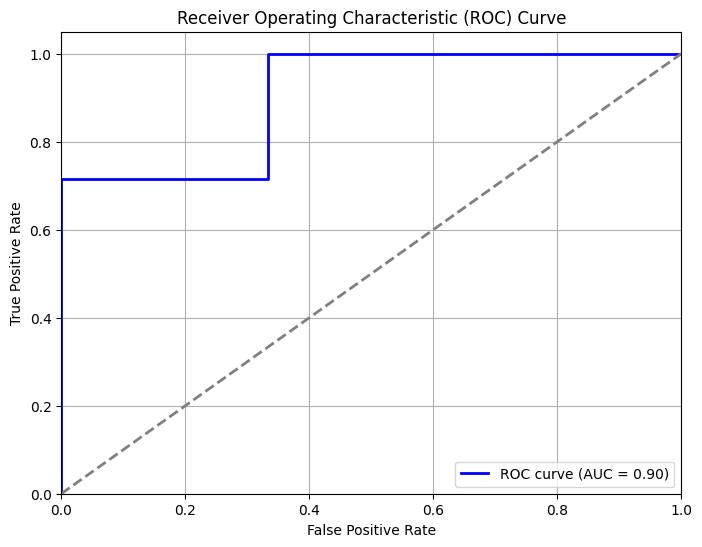

AUC (Area Under the Curve): 0.90


In [ ]:
# ROC and AUC
# Predict probabilities for the positive class (diabetes positive class)
y_prob = svm_model.decision_function(X_test)  # Get decision function scores

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC
print(f'AUC (Area Under the Curve): {roc_auc:.2f}')


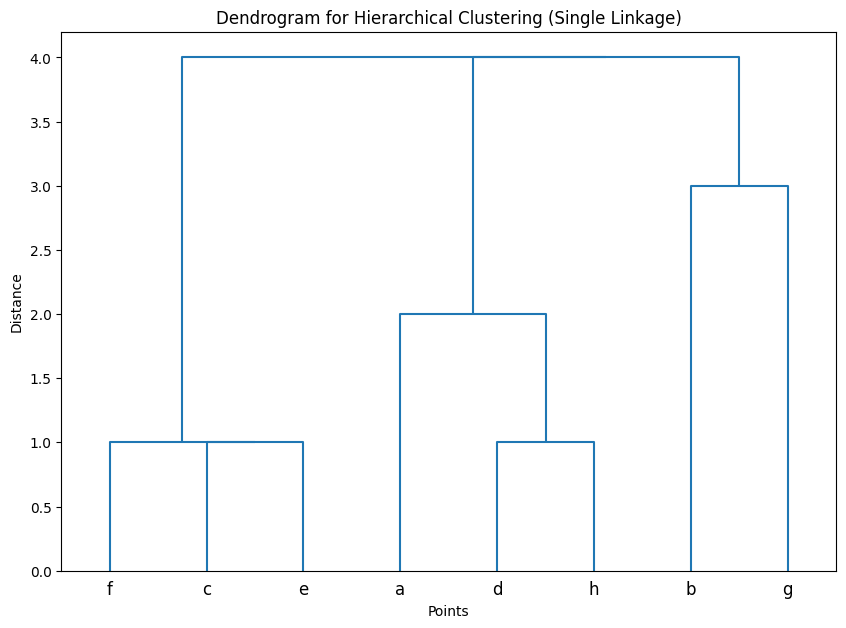

In [ ]:
#Problem 4

import numpy as np
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt

# Create the distance matrix (Note: we don't need the diagonal, since the distance to itself is always 0)
distance_matrix = np.array([
    [0, 5, 8, 4, 7, 7, 8, 2],
    [5, 0, 6, 4, 5, 4, 3, 4],
    [8, 6, 0, 5, 1, 2, 7, 6],
    [4, 4, 5, 0, 4, 4, 7, 1],
    [7, 5, 1, 4, 0, 1, 7, 5],
    [7, 4, 2, 4, 1, 0, 5, 5],
    [8, 3, 7, 7, 7, 5, 0, 8],
    [2, 4, 6, 1, 5, 5, 8, 0]
])

# Convert the square distance matrix to a condensed distance matrix
condensed_distance_matrix = dist.squareform(distance_matrix)

# Perform hierarchical clustering using the single linkage method
linked = sch.linkage(condensed_distance_matrix, method='single')

# Create a dendrogram to visualize the clustering
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], color_threshold=0)
plt.title('Dendrogram for Hierarchical Clustering (Single Linkage)')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()



In [ ]:
# Define the points and their coordinates
points = {
    'a': np.array([2, 10]),
    'b': np.array([2, 5]),
    'c': np.array([8, 4]),
    'd': np.array([5, 8]),
    'e': np.array([7, 5]),
    'f': np.array([6, 4]),
    'g': np.array([1, 2]),
    'h': np.array([4, 9])
}

# Define epsilon and minPts
epsilon = 6
minPts = 2

# Manhattan distance function
def manhattan_distance(p1, p2):
    return np.abs(p1[0] - p2[0]) + np.abs(p1[1] - p2[1])

# Function to determine if a point is a core point
def is_core_point(point, points, epsilon, minPts):
    count = 0
    for other_point in points.values():
        if manhattan_distance(point, other_point) <= epsilon:
            count += 1
    return count >= minPts

# Check for each point if it is a core point and store the result
core_points = {}
for label, point in points.items():
    core_points[label] = is_core_point(point, points, epsilon, minPts)

# Print core points
core_points = {label: point for label, point in core_points.items() if point}
print("Core Points:")
for label in core_points:
    print(f"Point {label} is a core point.")

Core Points:
Point a is a core point.
Point b is a core point.
Point c is a core point.
Point d is a core point.
Point e is a core point.
Point f is a core point.
Point g is a core point.
Point h is a core point.
